In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('AppleStore.csv')

In [3]:
df.head()
#The following shows how the dataset is structured, with 16 columns and 7196 rows.

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [5]:
df.describe()

#show the statistics of my dataset

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [6]:
prime_genre = df.groupby('prime_genre')['prime_genre'].agg(['count']).reset_index()
prime_genre.sort_values('count', ascending=False, inplace=True)
prime_genre

#show one of the categorical variables

,prime_genre,count
7,Games,3862
4,Entertainment,535
3,Education,453
14,Photo & Video,349
21,Utilities,248
8,Health & Fitness,180
15,Productivity,178
18,Social Networking,167
9,Lifestyle,144
11,Music,138


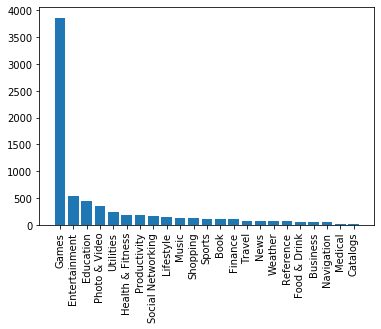

In [7]:
plt.bar(prime_genre['prime_genre'], prime_genre['count'])
plt.xticks(rotation='vertical')
plt.show()

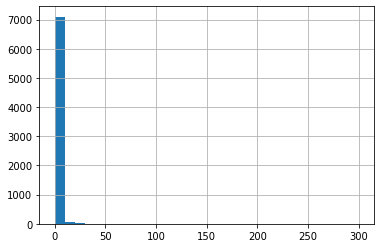

In [8]:
df['price'].hist(bins=30)

#shows one of the numeric variables, on which linear regression is based.

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

def print_metrics(y_true, y_pred):
    print(f'MAE: {mean_absolute_error(y_true, y_pred)}')
    print(f'MSE: {mean_squared_error(y_true, y_pred)}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_true, y_pred))}')
    print(f'R2: {r2_score(y_true, y_pred)}')

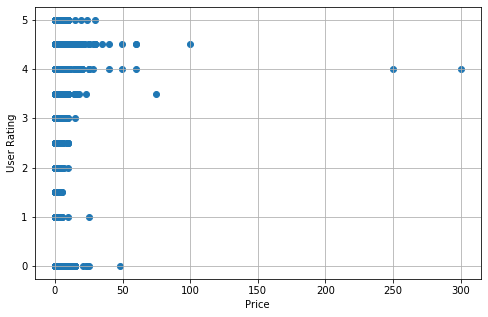

In [10]:
def linRegr(): 
    plt.figure(figsize=(8, 5))
    plt.scatter(df['price'], df['user_rating'])
    plt.xlabel('Price')
    plt.ylabel('User Rating')
    plt.grid()
    plt.show()
    
linRegr()
#Here I defined the method for calculating linear regression on my dataset, 
#defined using "Price" as an independent variable and "User Rating" as a dependent variable.
#before commenting on the plot, I defined the outliers, that is, all the applications that are priced above € 50

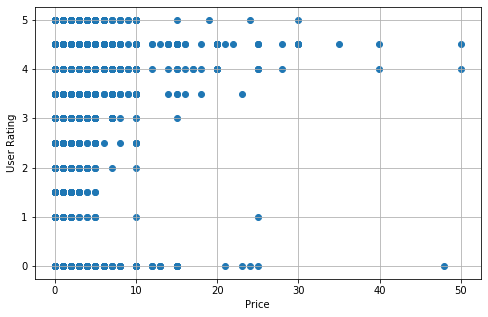

In [11]:
def deletePriceMore50():
    c=0
    lista=[]
    for i in df:
        if i=='price':
            for j in df[i]:
                if j>50:
                    lista.append(c)
                c=c+1 
    for i in lista:
        df.drop(i,inplace=True)
        
deletePriceMore50()
linRegr()

#Here I decided to eliminate all the occurrences of applications with a price above 50, defining them as outliers.
#I used this method and then called to make changes to the dataset.

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = df['price'].values.reshape(-1, 1)
y = df['user_rating'].values.reshape(-1, 1)
lr.fit(X, y)
y_pred = lr.predict(X)

print('Training error:')
print_metrics(y, lr.predict(X))

print()
print('Model parameters:')
print(lr.coef_, lr.intercept_)

#Here linear regression is performed using "Price" as an independent variable and "User Rating" as
#an dependent variable, as we can see from the results it is not what I expected as I believed there 
#could be a functional link between the two variables but it is not so, the coefficient R ^ 2 is very 
#close to zero while MSE is far from zero, we understand that the the model does not explain the dependent variable well.

Training error:
MAE: 1.133800490508944
MSE: 2.293232349942226
RMSE: 1.5143422169186944
R2: 0.005363670257376829

Model parameters:
[[0.0359177]] [3.4688145]


In [13]:
from sklearn.model_selection import train_test_split

# I leave the default proportions, 75% / 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)
lr.fit(X_train, y_train)

print('Training error:')
print_metrics(y_train, lr.predict(X_train))

print()
print('Test error:')
print_metrics(y_test, lr.predict(X_test))

#Here I tried to apply the Train / test slipt technique, leaving the proportions
#for training at 75% and for testing at 25%. We note that the results change little in R^2 and MSE, not very notable.

Training error:
MAE: 1.1249338013469883
MSE: 2.2684878698720263
RMSE: 1.506150015726198
R2: 0.006356741448204195

Test error:
MAE: 1.1600155091017754
MSE: 2.3678554555171334
RMSE: 1.5387837585304613
R2: 0.002317165270910304


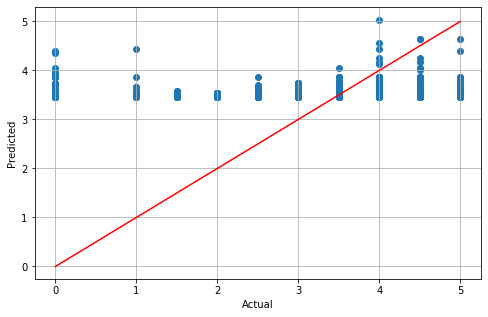

In [14]:
def plot_true_vs_pred(y_true, y_pred):
    plt.figure(figsize=(8, 5))
    plt.scatter(y_true, y_pred)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid()
    plt.show()
    
plot_true_vs_pred(y_test, lr.predict(X_test))

In [15]:
mlr_features = ['rating_count_tot', 'rating_count_ver', 'size_bytes']

X = df[mlr_features].values
y = df['price'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

#Here I added features for multiple linear regression, independent variables, in particular "total rating count",
#"rating count per version" and "size in byte of the application". These features have been related to "Price",
# dipendent variable.

Training error:
MAE: 1.7500340311936737
MSE: 8.278904764538394
RMSE: 2.8773085973767905
R2: 0.12699843095353136

Test error:
MAE: 1.8179899692260522
MSE: 9.56222202337092
RMSE: 3.0922842727296143
R2: 0.03319407026046939


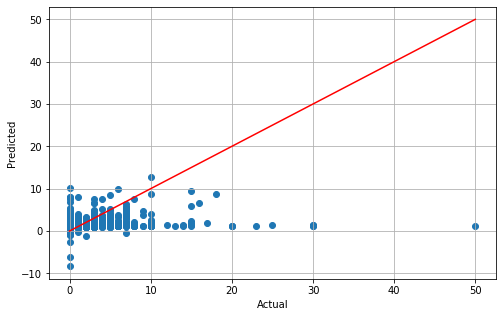

In [16]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

print('Training error:')
print_metrics(y_train, mlr.predict(X_train))
print()
print('Test error:')
print_metrics(y_test, mlr.predict(X_test))

plot_true_vs_pred(y_test, mlr.predict(X_test))

#Also here, the multiple linear regression gives bad results as we note
#the coefficient R ^ 2 very distant from 1 and the MSE very distant to zero, 
#from the plot it is in fact understood how the real model is distant from 
#the ideal model, therefore the features chosen are not have a strong addictive relationship with "Price".

Training error:
MAE: 1.7301390268350678
MSE: 8.156142399113202
RMSE: 2.855896076385344
R2: 0.13994358984642075

Test error:
MAE: 1.8097409776898168
MSE: 9.60106086685351
RMSE: 3.0985578688889306
R2: 0.02926719802393063


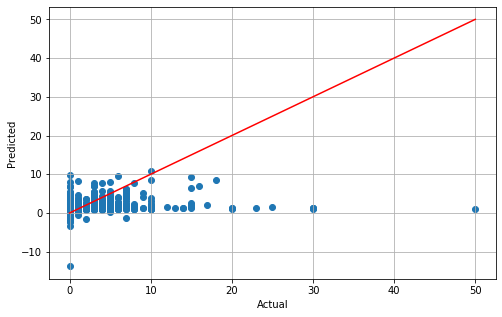

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features: 2nd degree
poly2 = PolynomialFeatures(degree=2)
X_train_p2 = poly2.fit_transform(X_train)
X_test_p2 = poly2.fit_transform(X_test)

mlr2 = LinearRegression(normalize=True)
mlr2.fit(X_train_p2, y_train)

print('Training error:')
print_metrics(y_train, mlr2.predict(X_train_p2))
print()
print('Test error:')
print_metrics(y_test, mlr2.predict(X_test_p2))

plot_true_vs_pred(y_test, mlr2.predict(X_test_p2))

Training error:
MAE: 1.7185014977237427
MSE: 8.066290741594997
RMSE: 2.8401216068321786
R2: 0.14941835012278115

Test error:
MAE: 1.8595812589916605
MSE: 15.933905677811547
RMSE: 3.9917296599107943
R2: -0.6110266479451538


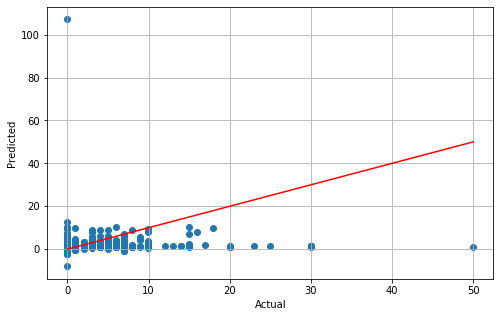

In [18]:
# Polynomial features: 3rd degree
poly3 = PolynomialFeatures(degree=3)
X_train_p3 = poly3.fit_transform(X_train)
X_test_p3 = poly3.fit_transform(X_test)

mlr3 = LinearRegression(normalize=True)
mlr3.fit(X_train_p3, y_train)

print('Training error:')
print_metrics(y_train, mlr3.predict(X_train_p3))
print()
print('Test error:')
print_metrics(y_test, mlr3.predict(X_test_p3))

plot_true_vs_pred(y_test, mlr3.predict(X_test_p3))

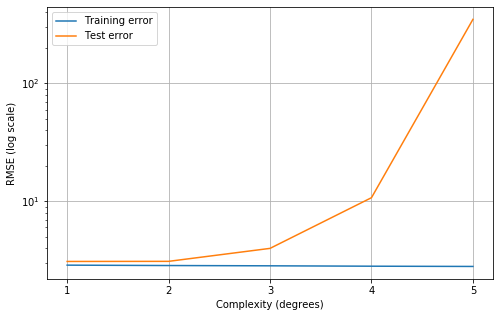

In [23]:
train_errors, test_errors = [], []
degrees = list(range(1, 6))

for deg in degrees:
    poly = PolynomialFeatures(degree=deg)
    X_train_p = poly.fit_transform(X_train)
    X_test_p = poly.fit_transform(X_test)

    mlrp = LinearRegression(normalize=True)
    mlrp.fit(X_train_p, y_train)
    
    # RMSE
    train_error = np.sqrt(mean_squared_error(y_train, mlrp.predict(X_train_p)))
    test_error = np.sqrt(mean_squared_error(y_test, mlrp.predict(X_test_p)))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training error')
plt.plot(test_errors, label='Test error')
plt.xticks(range(0, 5), degrees)
plt.xlabel('Complexity (degrees)')
plt.ylabel('RMSE (log scale)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21749.320280439977, tolerance: 5.113376203796364
  positive)
C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21749.32031150449, tolerance: 5.113376203796364
  positive)
C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21749.32062214535, tolerance: 5.113376203796364
  positive)
C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might

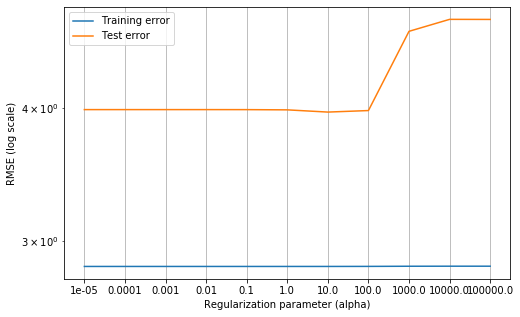

In [48]:
from sklearn.linear_model import Lasso

train_errors, test_errors = [], []
alphas = np.geomspace(1e-5, 1e5, 11)

# Using 3rd degree polynomial features
for alpha in alphas:
    rr = Lasso(alpha=alpha)
    rr.fit(X_train_p3, y_train)
    
    # RMSE
    train_error = np.sqrt(mean_squared_error(y_train, rr.predict(X_train_p3)))
    test_error = np.sqrt(mean_squared_error(y_test, rr.predict(X_test_p3)))
    train_errors.append(train_error)
    test_errors.append(test_error)
    
plt.figure(figsize=(8, 5))
plt.plot(train_errors, label='Training error')
plt.plot(test_errors, label='Test error')
plt.xticks(range(0, len(alphas)), alphas)
plt.xlabel('Regularization parameter (alpha)')
plt.ylabel('RMSE (log scale)')
plt.legend()
plt.yscale('log')
plt.grid()
plt.show()

Training error:
MAE: 1.7197623285765122
MSE: 8.074309566110728
RMSE: 2.8415329605884794
R2: 0.14857277373517408

Test error:
MAE: 1.887297225923703
MSE: 22.23938092619308
RMSE: 4.715864812120157
R2: -1.2485532442803486


C:\Users\Pasquale Siciliano\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21772.517191739124, tolerance: 5.113376203796364
  positive)


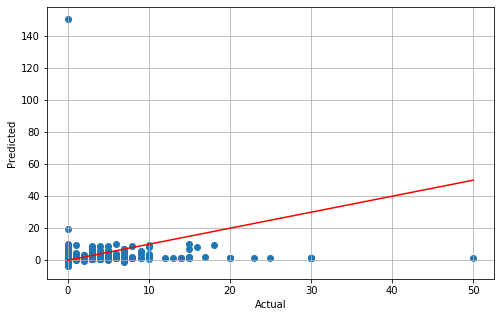

In [49]:
# Check with particular alpha value:
rr1 = Lasso(alpha=1000)
rr1.fit(X_train_p3, y_train)

print('Training error:')
print_metrics(y_train, rr1.predict(X_train_p3))
print()
print('Test error:')
print_metrics(y_test, rr1.predict(X_test_p3))

plot_true_vs_pred(y_test, rr1.predict(X_test_p3))


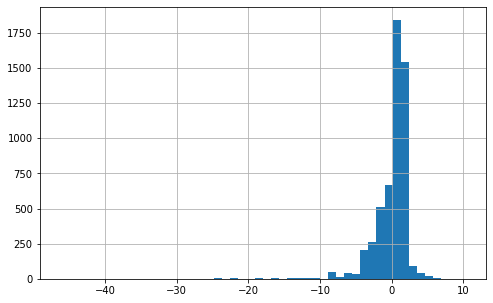

In [50]:
diffs = rr1.predict(X_train_p3) - y_train.reshape(-1)

plt.figure(figsize=(8, 5))
plt.hist(diffs, bins=50)
plt.grid()
plt.show()

In [51]:
# Start with Random Forest Regression
# select price and rating count tot for x
# select user rating for y
x = df.iloc[:, 5:6].values  
print(x) 
y = df.iloc[:, 8].values   
print(y)

[[3.99]
 [0.  ]
 [0.  ]
 ...
 [1.99]
 [0.  ]
 [0.  ]]
[4.  4.  3.5 ... 4.5 4.5 5. ]


In [52]:
# Fitting Random Forest Regression to the dataset 
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

# create regressor object 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

# fit the regressor with x and y data 
regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

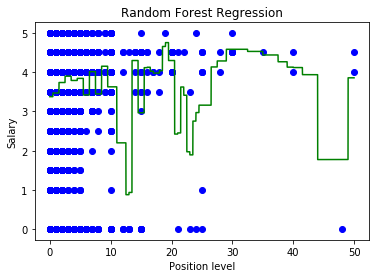

In [53]:
# Visualising the Random Forest Regression results 
# arange for creating a range of values 
# from min value of x to max  
# value of x with a difference of 0.01  
# between two consecutive values 
X_grid = np.arange(min(x), max(x), 0.01)  

# reshape for reshaping the data into a len(X_grid)*1 array,  
# i.e. to make a column out of the X_grid value                   
X_grid = X_grid.reshape((len(X_grid), 1)) 

# Scatter plot for original data 
plt.scatter(x, y, color = 'blue')   

# plot predicted data 
plt.plot(X_grid, regressor.predict(X_grid),  
         color = 'green')  
plt.title('Random Forest Regression') 
plt.xlabel('Position level') 
plt.ylabel('Salary') 
plt.show()